In [1]:
from main import parse_embeddings_and_type, plot_umap_structural
import numpy as np
from sklearn.manifold import TSNE
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

/home/ms3955/miniconda3/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/tmp/tmp.cyuVwcm2gm/ipykernel_3890511/1493346317.py:25: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min(N_PER_CLASS, len(x)), random_state=42))


           0          1
0 -37.654491  11.427183
1  10.630482  29.790070
2 -44.716732  -3.899584
3  12.641349 -29.981150
4  31.175142  32.183067


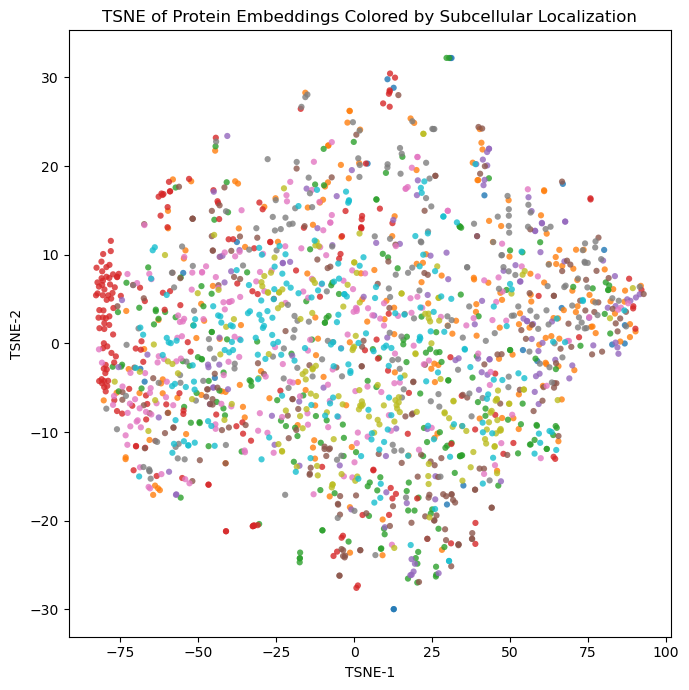

/tmp/tmp.cyuVwcm2gm/ipykernel_3890511/1493346317.py:25: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min(N_PER_CLASS, len(x)), random_state=42))


           0          1
0 -36.040455 -72.005112
1  46.314152 -39.102577
2   2.531248  79.195045
3   8.575036 -39.864380
4  73.700089  -9.558575


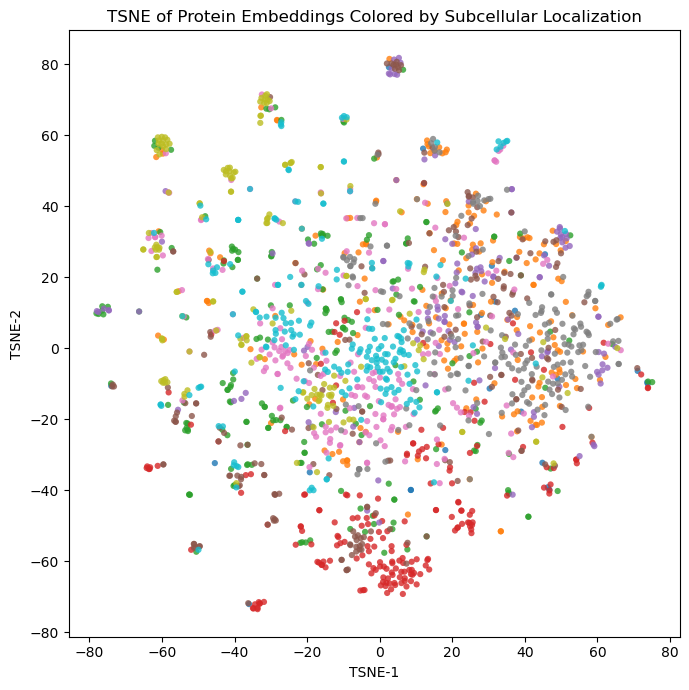

/tmp/tmp.cyuVwcm2gm/ipykernel_3890511/1493346317.py:25: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min(N_PER_CLASS, len(x)), random_state=42))


           0          1
0  38.621883  52.872356
1  38.747189  45.245655
2 -83.632980  35.183655
3  54.490448  26.023010
4   5.753789 -75.954025


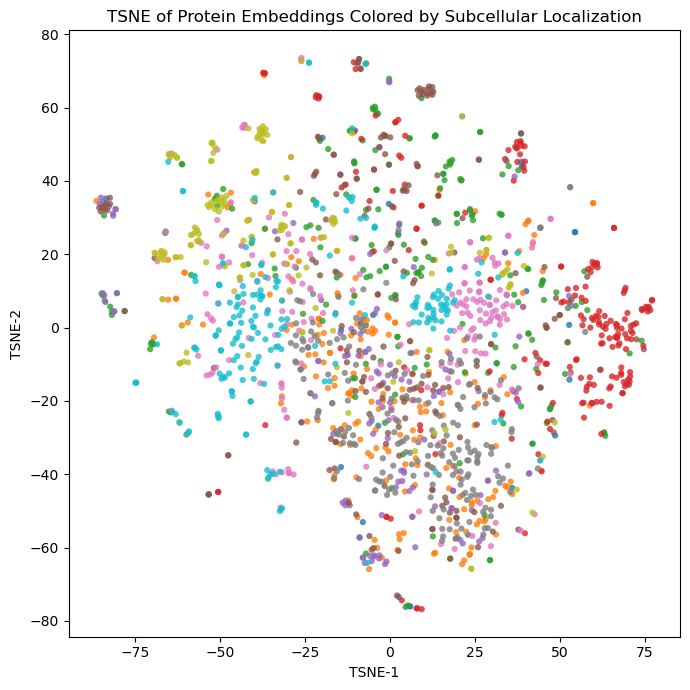

/tmp/tmp.cyuVwcm2gm/ipykernel_3890511/1493346317.py:25: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min(N_PER_CLASS, len(x)), random_state=42))


           0          1
0  72.690361  -3.041279
1  64.509140  -3.880433
2 -53.147121  29.828396
3  26.739779  -8.268046
4  27.462746 -66.547874


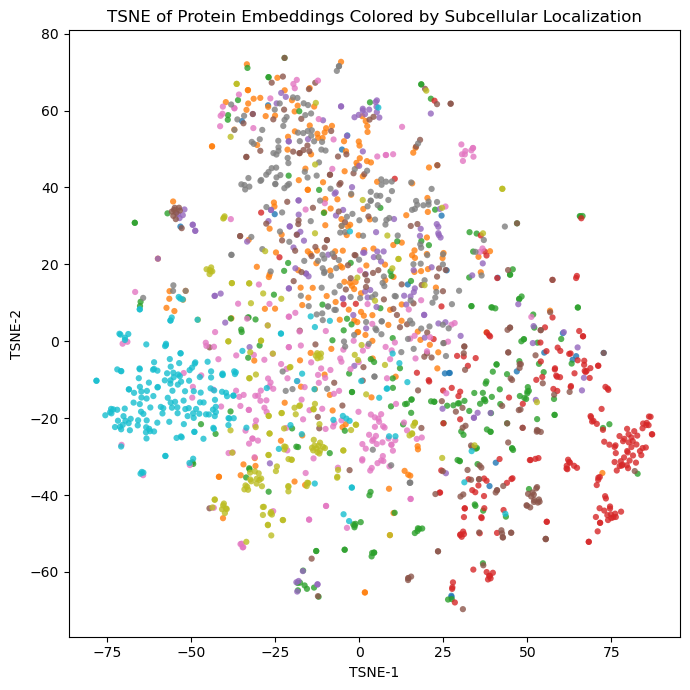

/tmp/tmp.cyuVwcm2gm/ipykernel_3890511/1493346317.py:25: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min(N_PER_CLASS, len(x)), random_state=42))


           0          1
0  21.498327 -18.044731
1  32.996021 -39.553036
2  73.849159  13.603702
3 -69.889832   5.941037
4 -79.537537 -38.989098


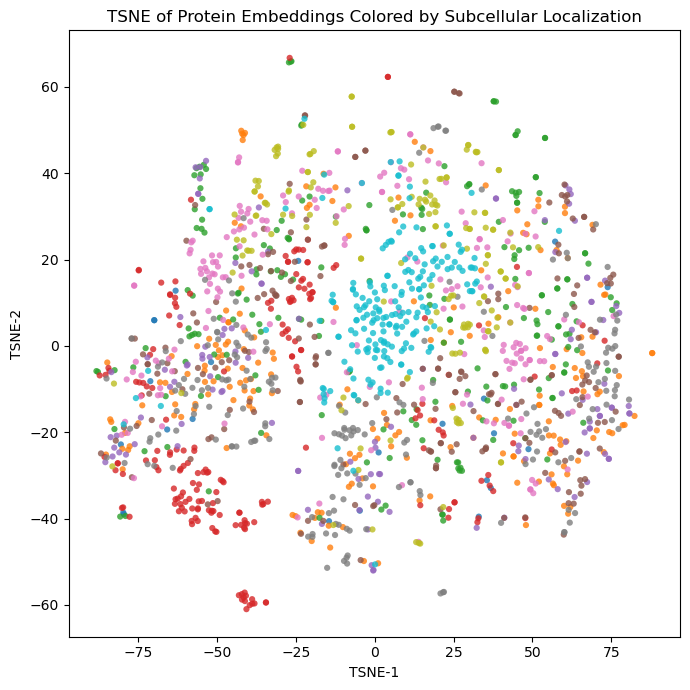

In [6]:
#plot_umap_structural(parse_embeddings_and_type(f'{model_name}_embeddings.csv'))
def prop_exp(X, C):
    ori_var = np.var(X)
    #print(ori_var)
    C = np.column_stack([np.ones(C.shape[0]), C])
    CtC_inv = np.linalg.inv(C.T @ C)
    beta = CtC_inv @ C.T @ X
    fitted = C @ beta
    X = X - fitted
    fin_var = np.var(X)
    #print(fin_var)
    var_exp = 1 - fin_var / ori_var
    return var_exp

pca_dim = 50
var_exp = {}

for model_name in ['bow', 'esm2_t6_8M_UR50D', 'esm2_t12_35M_UR50D', 'esm2_t30_150M_UR50D', 'prot_bert']:
    df = parse_embeddings_and_type(f"{model_name}_functional.parquet")
    #print(df['type'].value_counts())

    N_PER_CLASS = 200
    sampled_df = (
        df.groupby("type", group_keys=False)
        .apply(lambda x: x.sample(n=min(N_PER_CLASS, len(x)), random_state=42))
        .reset_index(drop=True)
    )
    #print(len(sampled_df))

    # NOTE: used scaled tsne for final presentation functional slide
    #plot_umap_structural(sampled_df, scale=False, tsne=True)
    plot_umap_structural(sampled_df, scale=True, tsne=True)
    '''
    X = np.array(pd.get_dummies(sampled_df["type"], prefix="type", drop_first=True).astype(int))
    Y = np.array(sampled_df["embedding"].tolist(), dtype=np.float32)
    Y_scaled = StandardScaler().fit_transform(Y)

    print(model_name, prop_exp(X, Y_scaled))
    var_exp[model_name] = []
    '''
    #PC = PCA(n_components=100).fit_transform(Y_scaled)
    #for pca_dim in [5, 10, 25, 50, 100]:
    #    print(pca_dim, prop_exp(X, PC[:, :pca_dim]))
    
    '''
    for i in range(pca_dim):
        #var_exp[model_name].append(prop_exp(X, PC[:, i]))
        var_exp[model_name].append(prop_exp(X, PC[:, i:]))
        print(f"{i}, {var_exp[model_name][-1]:.4f}")
    '''